In [1]:
# task 1

import numpy as np

def eigen_analysis(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    # A⋅v=λ⋅v
    for i in range(len(eigenvalues)):
        lambda_v = eigenvalues[i] * eigenvectors[:, i]
        A_v = np.dot(matrix, eigenvectors[:, i])
        if not np.allclose(lambda_v, A_v):
            print(f"Check failed for λ: {eigenvalues[i]} & v: {eigenvectors[:, i]}")
        else:
            print(f"Check successed for λ: {eigenvalues[i]} & v: {eigenvectors[:, i]}")
    
    return eigenvalues, eigenvectors

matrix = np.array([[4, 1], [2, 3]])
eigenvalues, eigenvectors = eigen_analysis(matrix)
print("Eigen values: ", eigenvalues)
print("Eigen vectors:\n", eigenvectors)


Check successed for λ: 5.0 & v: [0.70710678 0.70710678]
Check successed for λ: 2.0 & v: [-0.4472136   0.89442719]
Eigen values:  [5. 2.]
Eigen vectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


(3000, 4000, 3)


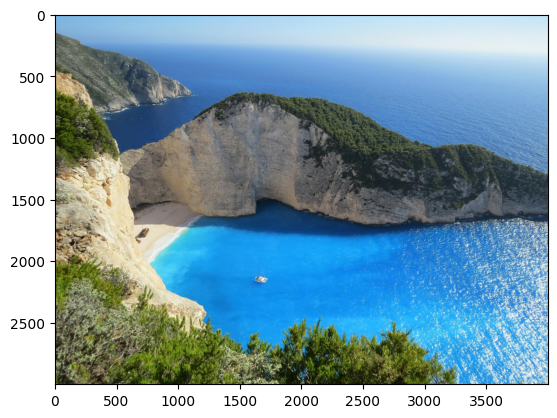

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

im_raw = imread("image.jpg")
print(im_raw.shape)
plt.imshow(im_raw)

1) Size of black-white photo: (3000, 4000)


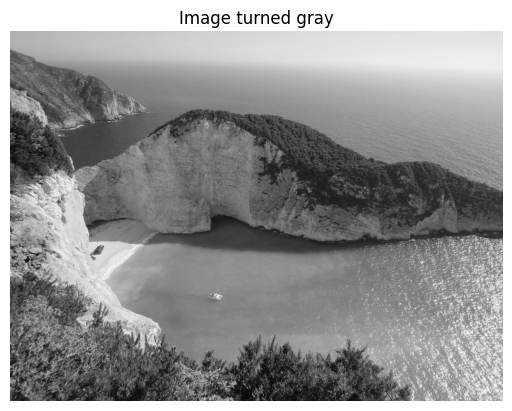

2) Amount of components to cover 95%: 132


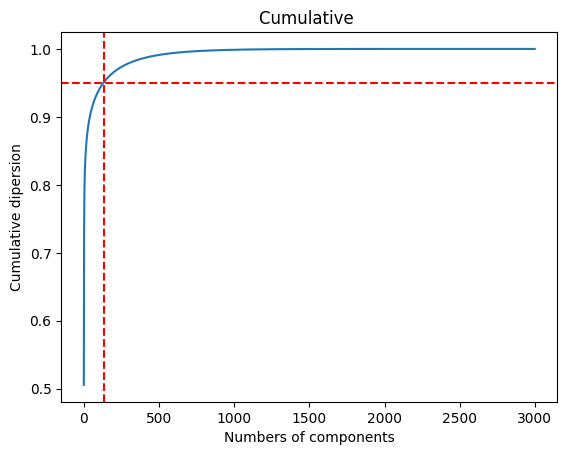

In [18]:
# task 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA


image = imread("image.jpg")

image_sum = image.sum(axis=2)
image_bw = image_sum / image_sum.max()
print("1) Size of black-white photo:", image_bw.shape)

plt.imshow(image_bw, cmap='gray')
plt.title("Image turned gray")
plt.axis('off')
plt.show()

pca = PCA()
pca.fit(image_bw)

# Кумулятивна дисперсія
cum_dispersion = np.cumsum(pca.explained_variance_ratio_)

# Знаходження кількості компонент для покриття 95% дисперсії
number_comp95 = np.argmax(cum_dispersion >= 0.95) + 1
print(f"2) Amount of components to cover 95%: {number_comp95}")

# Графік кумулятивної дисперсії
plt.plot(cum_dispersion)
plt.xlabel("Numbers of components")
plt.ylabel("Сumulative dipersion")

plt.title("Cumulative ")

plt.axvline(number_comp95, color='r', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()



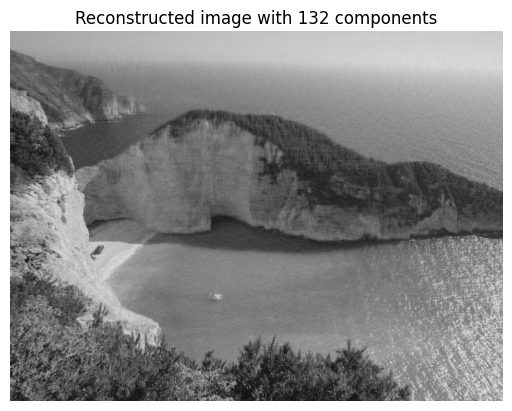

In [20]:
# reconstrust the image

components_amount = number_comp95
pca = PCA(n_components=components_amount)
im_bw_pca = pca.fit_transform(image_bw)
reconstructed_im = pca.inverse_transform(im_bw_pca) 

plt.imshow(reconstructed_im, cmap='gray')
plt.title(f"Reconstructed image with {components_amount} components")
plt.axis("off")
plt.show()


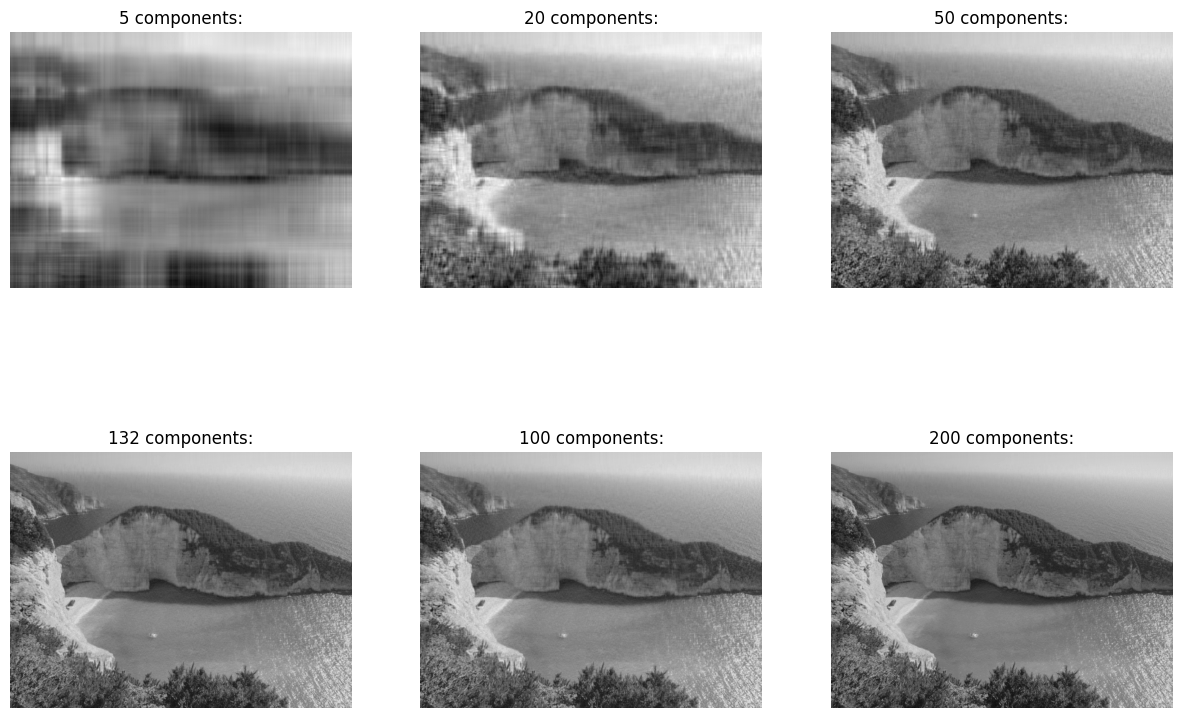

In [23]:

def reconstruct_image(image, comp_am):
    pca = PCA(n_components=comp_am)
    im_bw_pca = pca.fit_transform(image)
    reconstructed_im = pca.inverse_transform(im_bw_pca)
    return reconstructed_im

def plot_all():
    components_list = [5, 20, 50,components_amount, 100, 200]

    plt.figure(figsize=(15, 10))
    for i, comp_am in enumerate(components_list):
        plt.subplot(2, 3, i+1)
        image_reconstructed = reconstruct_image(image_bw, comp_am)
        plt.imshow(image_reconstructed, cmap='gray')
        plt.title(f"{comp_am} components:")
        plt.axis('off')

    plt.show()

plot_all()

In [35]:
# task 3

def encrypt_message(message, key_matrix):
    
    # turn vector into array of ASCII codes
    message_vector = np.array([ord(char) for char in message])
    
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    
    # diagonalize our key matrix
    diagonalized_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    
    # encrypt the message by multiplying diag matrix on our message vector
    encrypted_vector = np.dot(diagonalized_matrix, message_vector)
    
    return encrypted_vector

def decrypt_message(encrypted_vector, key_matrix):
    
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    
    # diagonalize using reversed eigenvaues
    diagonalized_matrix = np.dot(np.dot(eigenvectors, np.diag(1 / eigenvalues)), np.linalg.inv(eigenvectors))
    
    # find our vector by multiplying diag matrix on encrypted vector
    decrypted_vector = np.dot(diagonalized_matrix, encrypted_vector)
    
    # change ASCII codes into chars
    decrypted_message = ''.join(chr(int(np.round(np.real(num)))) for num in decrypted_vector)
    return decrypted_message


message = "Linear algebra"
print("Initial message: ", message)

# make a random key matrix
matrix = np.random.randint(0, 256, (len(message), len(message)))

encrypted_message = encrypt_message(message, matrix)
print("Encrypted Message: \n", encrypted_message)

decrypted_message = decrypt_message(encrypted_message, matrix)
print("Decrypted Message:", decrypted_message)

Initial message:  Linear algebra
Encrypted Message: 
 [175678.+3.08625457e-12j 210836.+5.46614806e-12j 134536.-8.12770572e-12j
 133598.+8.40376075e-12j 173365.-4.66485331e-12j 123940.-3.20596418e-13j
 211548.+8.85941361e-12j 180975.+5.84566564e-12j 188895.+3.14533863e-12j
 182743.+1.01977954e-11j 155377.+7.59265227e-12j 179726.+8.01077572e-12j
 181386.-5.57708879e-13j 144728.+4.94269921e-12j]
Decrypted Message: Linear algebra
